In [3]:
#MNIST is one of the most popular datasets for machine learning practice, its widely studied and is available in the sklearn library, we will import it here and display the keys available in it
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
# here is display of 2 available arrays contained in the data set, there are 70.000 images and each image has 784 features, meaning each image is 28 x 28 pixels
X, y = mnist["data"],mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
# we will now display one of the images
import matplotlib as mpl
import matplotlib.pyplot as plt


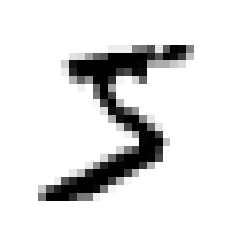

In [7]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

In [8]:
# And the image lable here
y[0]

'5'

In [9]:
# Now we will turn lable from string into integer
y = y.astype(np.uint8)

In [10]:
# Since the data set is already split and shuffled we can assign values directly, visit dataset documentation for more details
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[6000:]

In [11]:
# We will simplify the problem by only working with number 5 for now
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [12]:
# We will now pick a classifier and train it, for this exercise we will go ahead with SGD Stochastic Gradient Descent, which is really good with large datasets in part because it approaches training instances one at a time
from sklearn.linear_model import SGDClassifier

In [13]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [14]:
# Lets try and guess if [some_digit] is 5
sgd_clf.predict([some_digit])

array([ True])

In [15]:
# Lets measure performance of our model using Kfold cross validation
from sklearn.model_selection import cross_val_score

In [16]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [17]:
# Over 95% correct prediction, looks amazing, but before we wrap it up and move on, lets build a model that predicts all the numbers to be not 5
from sklearn.base import BaseEstimator

In [18]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [19]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [ ]:
# over 90% accuracy, as only about 10% of images are 5s if we guess that none of them are, we will be correct at about 90% of the time, hence why accuracy is not the best scoring system for classifiers

In [ ]:
#CONFUSION MATRIX

In [20]:
from sklearn.model_selection import cross_val_predict

In [21]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [22]:
# first row avaliates predictions of non 5 images, 53892 were correctly predicted as non 5 images(true negatives) while 687 were wrongly classified as 5,(False positive), second row considers images of 5, 1891 were wrongly classified as non 5(false negative), while 3530 were correctly classified as 5(true positive)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [23]:
# A perfect model would have only true negatives and true positives
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [24]:
# One of measurement metrics to check classifier performance is the precision of the classifier and the recall
# Prediction precission when guessing that image is a 5
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [25]:
# Detection percentage of 5's
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [26]:
# We can choose to combine both predictions into 1 
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [ ]:
# If we are to identify videos safe for kids we might want a model that will reject a lot of good videos (low recall) but keeps only the good ones (high precision) rather than one that lets a few really bad ones through(high recall), on the other hand if we are trying to catch shoplifters a high recall is not that much of an issue, even if security get a few false positive calls, most of the shoplifters will be caught

In [ ]:
# Remember that increasing precision reduces recall and vice versa, this is the trade off 

In [29]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [32]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [33]:
# raising threshold decreases recall
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [34]:
# how to decide what threshold to use, first use cross_val_predict to get score of all the instances of the training set
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [36]:
# With these scores use the prediction_recall_curve to compute precision and recall for all possible thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [42]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

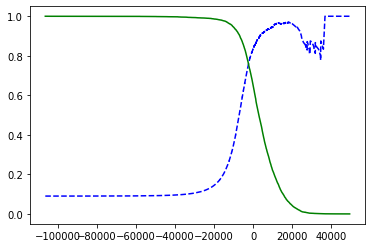

In [43]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [47]:
# if you want to find out the lowest threshold for 90% precision np.argmax will give us that value
threshold_90_precision = thresholds[np.argmax(precisions >=0.90)]
threshold_90_precision

3370.0194991439557

In [48]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [49]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [50]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [51]:
# now we have a 90% precission classifier

In [52]:
# a 90% precision classifier is not usefull if recall is too low, lets try ROC curve

In [53]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [54]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')

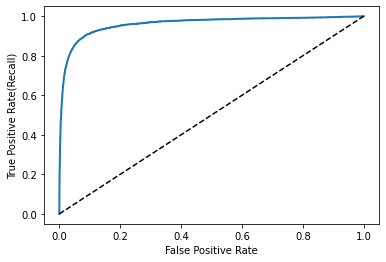

In [64]:
plot_roc_curve(fpr,tpr)
plt.ylabel('True Positive Rate(Recall)')
plt.xlabel('False Positive Rate')
plt.show()

In [65]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [66]:
# we can see that higher the recall higher the false positives are in the model, 

In [67]:
# Lets try random forests classifier now

In [70]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [71]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

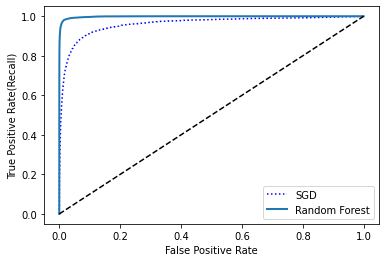

In [73]:
plt.plot(fpr,tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.ylabel('True Positive Rate(Recall)')
plt.xlabel('False Positive Rate')
plt.show()

In [74]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [80]:
# multiclass clasification, if a model that can handle multiple classes is not used, than multiple binary models can be ran in paralel to perform same task, you can build 10 classifiers for numbers from 0 to 9 and ran all of them against the number, and see which gives you highest score, OvR, one versus all, or build a model that considers pairs of digits 0 v 1, 0 v 2, 1 v 2 and so on and so on

In [82]:
# Lets try support Vector machine classifier which will train 45 binary classifiers and select the class that will win the most duels
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [83]:
# lets check decision_function and the scores per instance
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [84]:
# lets check which number got the highest score
np.argmax(some_digit_scores)

5

In [85]:
# when a classifier is trained it will store target classes in its classes_ attribute ordered by value
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [86]:
# in our case our target class of 5 is at the index of 5 as well, usually you wont be this lucky
svm_clf.classes_[5]

5

In [87]:
# we can force the classifier to be One vs One or One vs Rest
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [88]:
len(ovr_clf.estimators_)

10

In [89]:
# Training SGDClassifier is just as easy, in this case it fails to detect correct number
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [90]:
# here we see scores for each instance
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [91]:
# we can check models performance 
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [92]:
# performance can be inproved through input scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [94]:
# Lets take a look at the confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

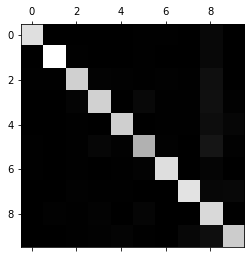

In [95]:
# Now lets visualize it
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [97]:
# Lets focus on the error matrix, first divide each value by the corresponding number in each class
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

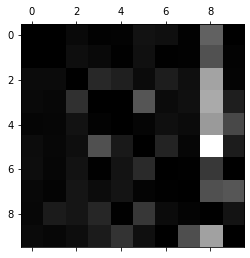

In [99]:
# Fill diagonal line with 0's so that we keep only errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [100]:
# lets focus on 3 and 5 errors
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [103]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

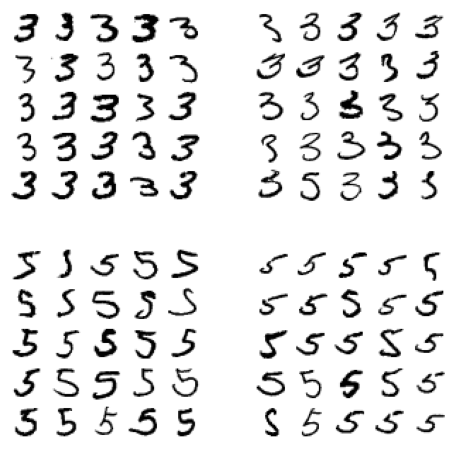

In [104]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [105]:
# top left and bottom left box shows images classified as 3 and other 2 are images classified as 5, 

In [109]:
# Now lets take a look at multilabel classification system
# we will build a multilabel model that will check whether our subject is higher or equal to 7 and then whether is an odd number
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_tainr_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_tainr_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [110]:
# not higher or equal to 7 but it is odd
knn_clf.predict([some_digit])

array([[False,  True]])

In [111]:
# lets evaluate model score by computing average F1 
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")
# this will consider all labels to be equally important, if there is uneven amount of information for the labels you might want to give each label weight amount based on its support, (number of instances with the target lable,) average="weighted"

0.976410265560605

In [112]:
# lets take a look at multioutput classification now
# we will take one of the images and add noise to its pixels
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train 
y_test_mod = X_test



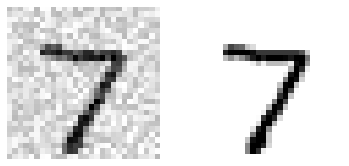

In [117]:
some_index = 0
plt.subplot(121); plot_digits([X_test_mod[some_index]])
plt.subplot(122); plot_digits([y_test_mod[some_index]])
plt.show()

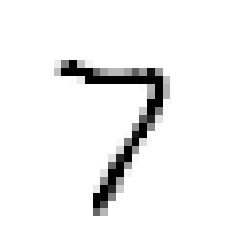

In [119]:
# Lets take a look at the images ( no good, do not look at test data)
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digits(clean_digit)